In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Advertising.csv').drop(columns="Unnamed: 0")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#
predict_sales = lambda x,w,b: w * x + b

In [5]:
#
def cost_function(radios, sales, weight, bias):
    companies = len(radios)
    total_error = 0.0
    
    for i in range(companies):
        total_error += (sales[i] - predict_sales(radios[i], weight, bias))**2
        
    return total_error / companies

In [6]:
#
def update_weights(radio, sales, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    companies = len(radio)
    
    for i in range(companies):
        #derivadas parcial de la funcion de coste
        
        #-2x(y - (mx + b))
        weight_deriv += -2 * radio[i] * (sales[i] - (weight*radio[i] + bias))
        
        #-2(y - (mx + b))
        bias_deriv += -2 * (sales[i] - (weight*radio[i] + bias))
        
        weight -= (weight_deriv / companies) * learning_rate
        bias -= (bias_deriv / companies) * learning_rate
        
        return weight, bias

In [7]:
#
def train(radio, sales, weight, bias, learning_rate, iters):
    cost_history = []
    
    for i in range(iters):
        weight, bias = update_weights(radio, sales, weight, bias, learning_rate)
        
        #cost
        cost = cost_function(radio, sales, weight, bias)
        cost_history.append(cost)
        
        #log
        if i % 10 == 0:
            print(f"iter={i} weight={weight} bias={bias} cost={cost}")
            
    return weight, bias, cost_history

In [8]:
train_value = train(df.radio, df.sales, 0, 0, 0.006, 31)
print(train_value[1])

iter=0 weight=0.0501228 bias=0.0013260000000000001 cost=188.43863340545536
iter=10 weight=0.36642597003100796 bias=0.009693808730979048 cost=54.107492175140166
iter=20 weight=0.4954175371350907 bias=0.013106284051192876 cost=43.08148293681734
iter=30 weight=0.5480215764254207 bias=0.014497925302259806 cost=45.86190734660054
0.014497925302259806


In [9]:
Y1 = predict_sales(0, train_value[0], train_value[1])
Y2 = predict_sales(60, train_value[0], train_value[1])

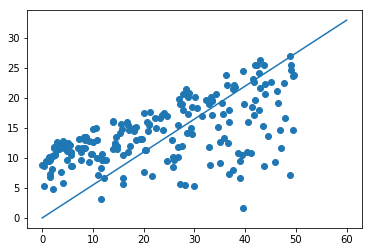

In [10]:
plt.scatter(df.radio, df.sales)
plt.plot([0,60], [Y1,Y2])
plt.show()